In [1]:
# Import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
# Load csv file
data = pd.read_csv('...') # Insert filename with correct path

In [ ]:
# View summary of data
data.info()

In [3]:
# Rename columns to make it easier to read - this is an optional step 
col_names = ['id','timestamp','status','name','fb_handle','place_of_work','q1','q2','q3']
data.columns = col_names

In [4]:
# List of MCQ options for Q1
q1_items = [r'Sharing of technology-mediated lessons by other teachers (e.g. using SLS to design a blended learning experience, etc)',
          r'Sharing of technology tools (e.g. Nearpod, Edpuzzle, etc)', 
          r'Sharing of relevant resources (e.g. articles or reflections, etc) on Educational Technology',
          r'Sharing of PD opportunities (e.g. Open Classroom, Webinars, etc)',
          r'Sharing by SLS Office (e.g. New Release of SLS Features, SLS Feature Guides, etc)', 
          r'Sharing on e-Pedagogy by SgLDC Admin (e.g. infographics on Key Applications of Technology - KATs, updated guide to e-Pedagogy, etc)', 
          r'Participating in Virtual Meets']

In [5]:
# Shortened names for Q1 options
q1_items_shortened = ['Sharing of Lessons',
                     'Sharing of Tech Tools',
                     'Sharing of Other Resources (e.g. articles)',
                     'Sharing of PD opportunities (e.g. Webinars)',
                     'Sharing by SLS Office (e.g. SLS Feature Guides)',
                     'Sharing by SgLDC Admin (e.g. KAT Infographics)',
                     'Participating in Virtual Meets']

In [6]:
# Count number of responses for each MCQ
q1_responses={}
for item, name in zip(q1_items, q1_items_shortened):
    count = data['q1'].str.contains(item,regex=False).sum()
    q1_responses[name]=[count]

In [7]:
# Load results into dataframe and sort by values
q1_responses = pd.DataFrame.from_dict(q1_responses)
q1_responses = q1_responses.sort_values(by=0,axis=1)

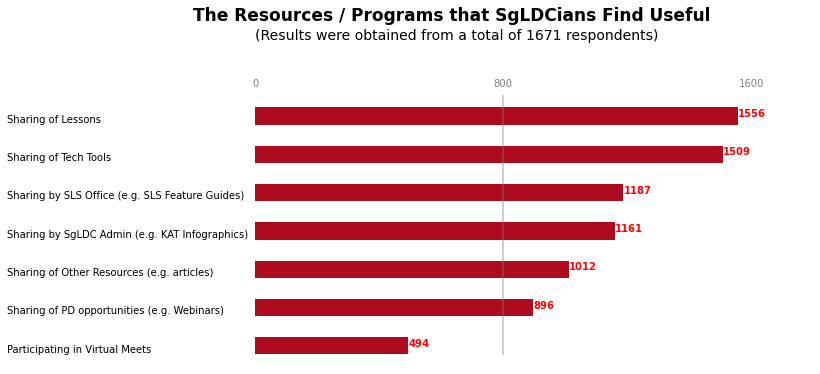

In [9]:
# Print bar chart 
fig, ax = plt.subplots(figsize = (10,5))    
ax.barh(q1_responses.columns, q1_responses.loc[0], height = 0.45, color='#af0b1e')
plt.xlim((0,1800))
ax.text(x=-200,y=8.5, s = 'The Resources / Programs that SgLDCians Find Useful',
        size=17, weight='bold')
ax.text(x=0,y=8, s = '(Results were obtained from a total of 1671 respondents)',
        size=14)
for i, v in enumerate(q1_responses.loc[0]):
    ax.text(v + 0.50, i, str(v), color='red', fontweight='bold')
for location in ['top','left','bottom','right']:
    ax.spines[location].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.set_xticks([0,800,1600])
ax.axvline(x=800, ymin=0.048, c='grey', alpha=0.5)
ax.set_yticklabels([]) # an empty list removes the labels
for i, item in zip(range(20), q1_responses.columns):
    ax.text(x=-800, y=i-0.15, s=item)
plt.savefig('',bbox_inches='tight') # Insert filename with correct file path here
plt.show()

In [10]:
# Doing the same as for Q1
q2_items = ['Access to catalogue of past Virtual Meet recordings organised by level and subjects',
         'Access to catalogue of lesson designs shared by SgLDC members',
         'Receiving constructive feedback from the community and SgLDC admin on lesson designs',
         'Brief and informal sessions where teachers can share affordances of tech tools or platforms in enhancing teaching and learning',
         'Trial newly developed e-Pedagogy resources for teachers (e.g. bite-sized online learning) before launch']

In [11]:
q2_items_shortened = ['Access to VM Recordings',
                     'Access to catalogue of lessons shared on SgLDC',
                     'Receive feedback from SgLDC admin & members on lesson designs',
                     'Brief and informal sessions on sharing of tech tools',
                     'Trial newly developed e-Pedagogy resources for teachers']

In [12]:
q2_responses={}
for item, name in zip(q2_items, q2_items_shortened):
    count = data['q2'].str.contains(item,regex=False).sum()
    q2_responses[name]=[count]

In [13]:
q2_responses = pd.DataFrame.from_dict(q2_responses)
q2_responses = q2_responses.sort_values(by=0,axis=1)

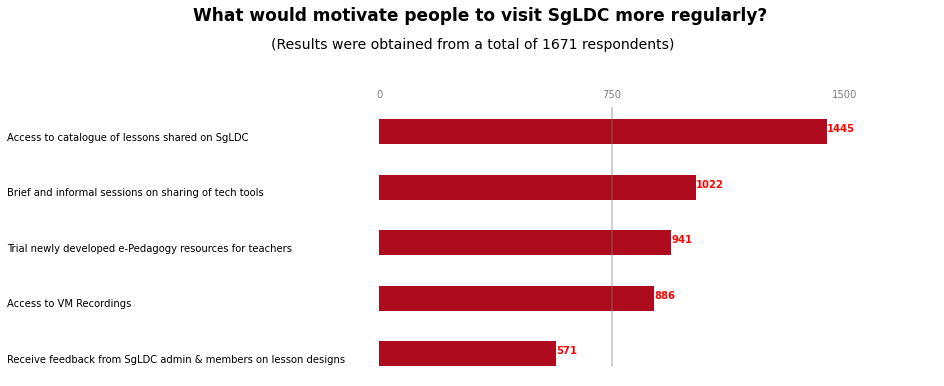

In [14]:
fig, ax = plt.subplots(figsize = (10,5))    
ax.barh(q2_responses.columns, q2_responses.loc[0], height = 0.45, color='#af0b1e')
plt.xlim((0,1800))
ax.text(x=-600,y=6, s = 'What would motivate people to visit SgLDC more regularly?',
        size=17, weight='bold')
ax.text(x=-350,y=5.5, s = '(Results were obtained from a total of 1671 respondents)',
        size=14)
for i, v in enumerate(q2_responses.loc[0]):
    ax.text(v + 0.50, i, str(v), color='red', fontweight='bold')
for location in ['top','left','bottom','right']:
    ax.spines[location].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.set_xticks([0,750,1500])
ax.axvline(x=750, ymin=0.048, c='grey', alpha=0.5)
ax.set_yticklabels([]) # an empty list removes the labels
for i, item in zip(range(20), q2_responses.columns):
    ax.text(x=-1200, y=i-0.15, s=item)
plt.savefig('',bbox_inches='tight') # Save file with correct file path (e.g. /Users/admin/Desktop/Data Refresh 2022/Results/Q2.png)
plt.show()

In [ ]:
# Pre-process results for Q3 - replace filler words like 'Nil' and 'NA' with np.nan
data['q3'].unique()

In [ ]:
data['q3'] = data['q3'].replace({'Nil':np.nan,
                                'nil':np.nan,
                                'NIL':np.nan,
                                '-':np.nan,
                                'Not at the moment':np.nan,
                                'N.A.':np.nan,
                                'na':np.nan,
                                'Not yet for now:)':np.nan,
                                'no':np.nan,
                                'No':np.nan})

In [ ]:
new_file = data.dropna()

In [ ]:
# Save results as csv file
new_file.to_csv('') # Input filename here